# IRIS FLOWER CLASSIFICATION

Task : 
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

## Importing Dataset

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
# Display the first few rows of the 'iris' DataFrame
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Display the last few rows of the 'iris' DataFrame
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Get the dimensions
iris.shape

(150, 6)

In [6]:
# Count missing values in each column
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Get the data types of each column
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
# Display information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# Remove the 'Id' column
iris.drop('Id',axis=1,inplace=True)

In [10]:
# Get the unique values in the 'Species' column
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
# Group the 'iris' DataFrame by the 'Species' column
data = iris.groupby("Species")

In [12]:
# Display the first few rows of each group in the 'data'
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


## Visualizing the Dataset

In [13]:
# Set the default Seaborn plotting style
sns.set()

### Boxplot

Text(0.5, 1.0, 'SepalLength')

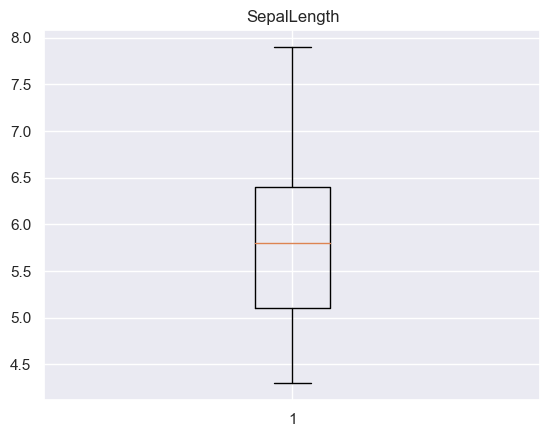

In [14]:
plt.boxplot(iris["SepalLengthCm"])
plt.title("SepalLength")

Text(0.5, 1.0, 'SepalWidth')

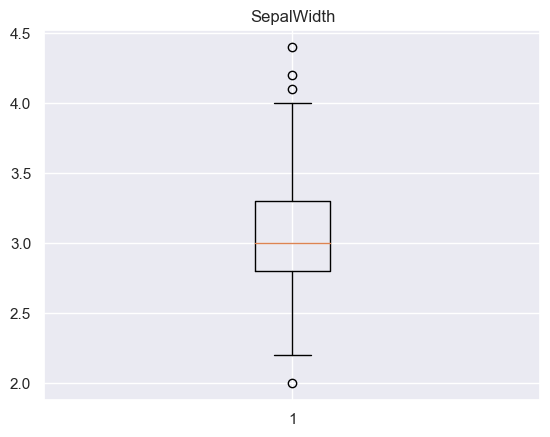

In [15]:
plt.boxplot(iris['SepalWidthCm'])
plt.title('SepalWidth')

Calculates the Interquartile Range (IQR) for the "SepalWidthCm" 

In [16]:
Q1 = iris['SepalWidthCm'].quantile(0.25)
Q3 = iris['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
iris_no_outliers = iris[(iris['SepalWidthCm'] >= lower_bound) & (iris['SepalWidthCm'] <= upper_bound)]

Text(0.5, 1.0, 'SepalWidth_Without_Outliers')

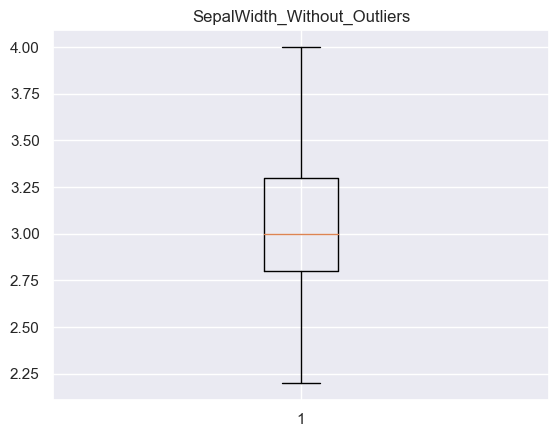

In [19]:
plt.boxplot(iris_no_outliers['SepalWidthCm'])
plt.title('SepalWidth_Without_Outliers')

Text(0.5, 1.0, 'PetalLength')

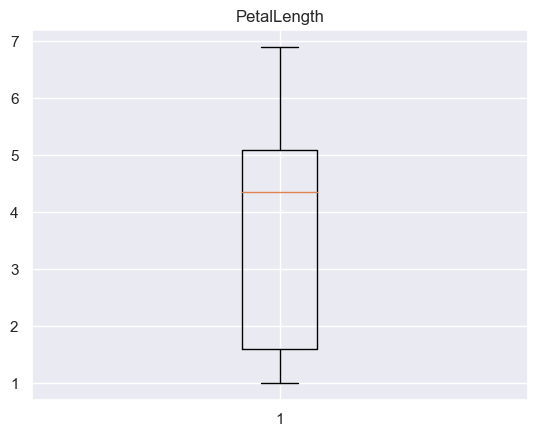

In [20]:
plt.boxplot(iris['PetalLengthCm'])
plt.title('PetalLength')

Text(0.5, 1.0, 'PetalWidth')

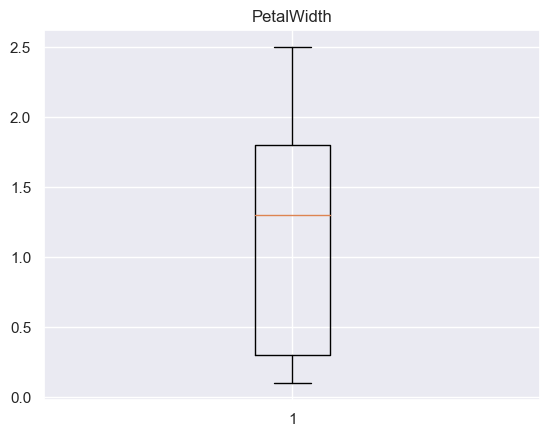

In [21]:
plt.boxplot(iris['PetalWidthCm'])
plt.title('PetalWidth')

### Pie Chart

In [22]:
species=iris["Species"]
counts=len (species.unique())
print("The no of distinct species=",counts)
print("Table of no of species count")
value_counts = iris["Species"].value_counts()
print(value_counts)

The no of distinct species= 3
Table of no of species count
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


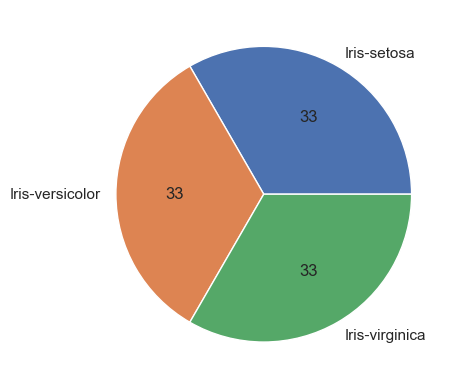

In [23]:
vector = []
for object, count in value_counts.items():
    vector.append(count)
s=species.unique()
print(s)
plt.pie(vector, labels=s, autopct="%1.0d")
plt.show()

### Scatter Plot

Text(0.5, 1.0, 'Scatter_Plot')

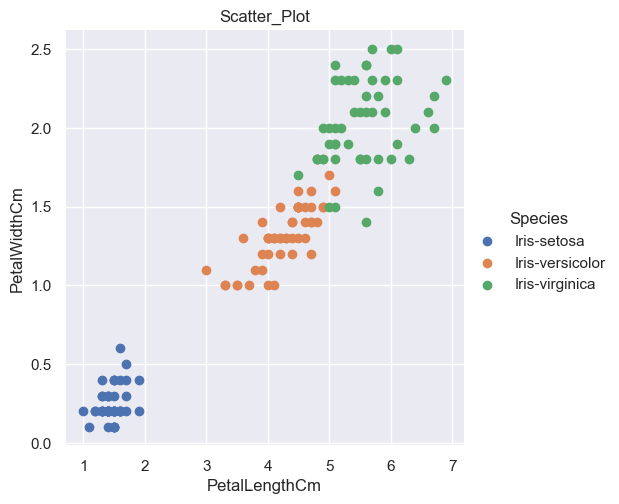

In [24]:
sns.FacetGrid(iris, hue="Species", height=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()
plt.title('Scatter_Plot')

Text(0.5, 1.0, 'Scatter_Plot')

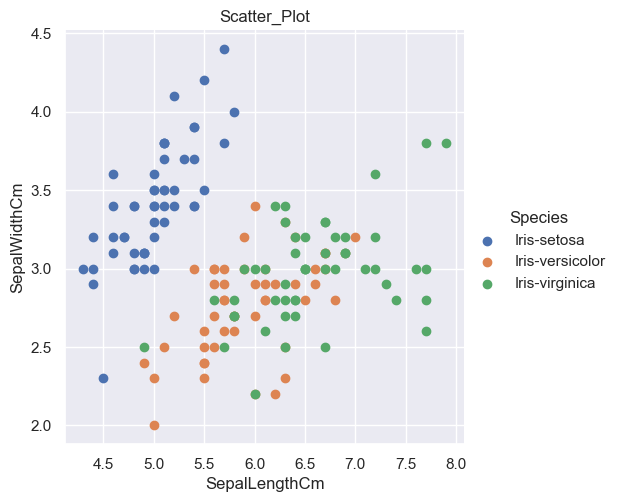

In [25]:
sns.FacetGrid(iris, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
plt.title('Scatter_Plot')

### Pair Plot

<Figure size 500x500 with 0 Axes>

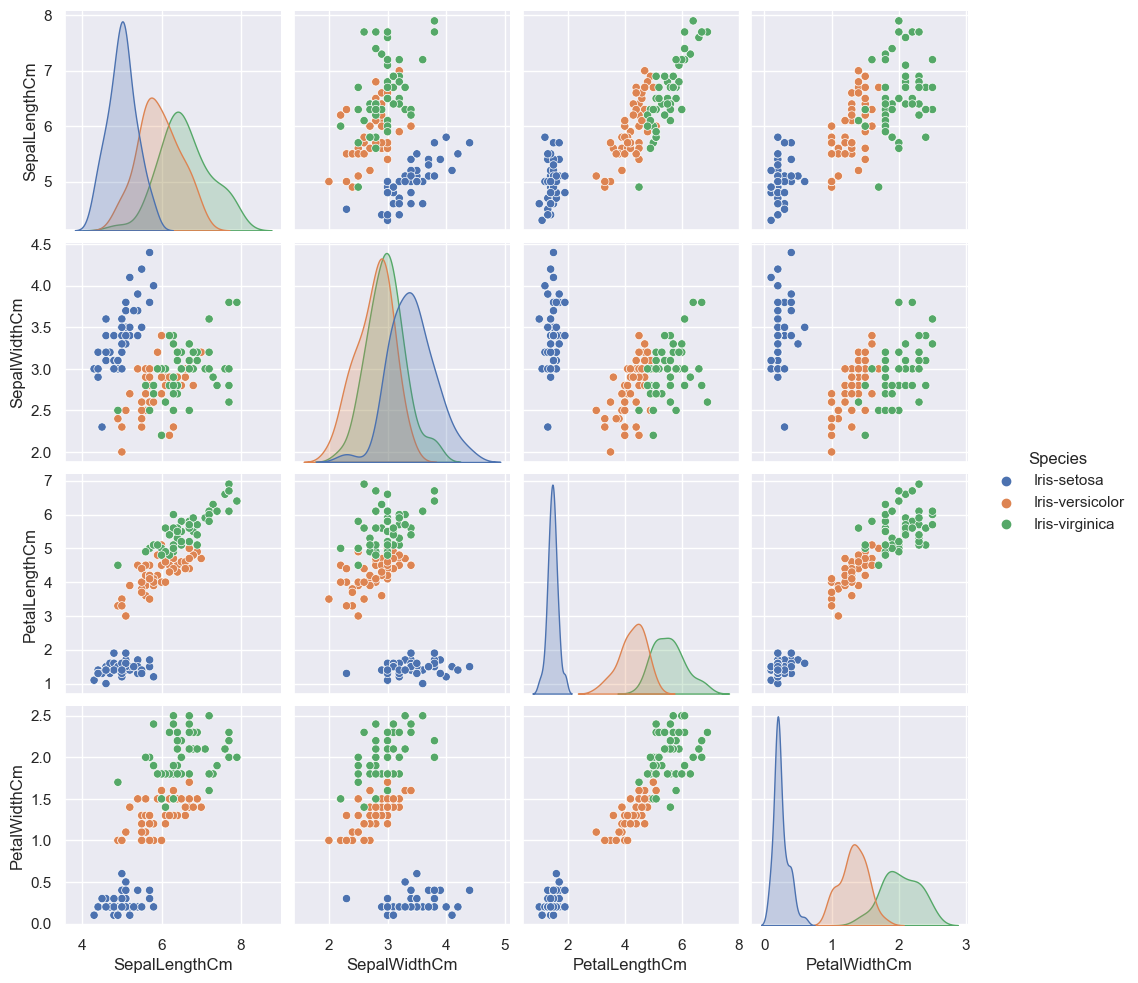

In [26]:
plt.figure(figsize=(5,5))
# custom_palette = {'setosa': 'blue', 'versicolor': 'green', 'virginica': 'red'}
sns.pairplot(iris,hue='Species')

### Histogram

Text(0, 0.5, 'count')

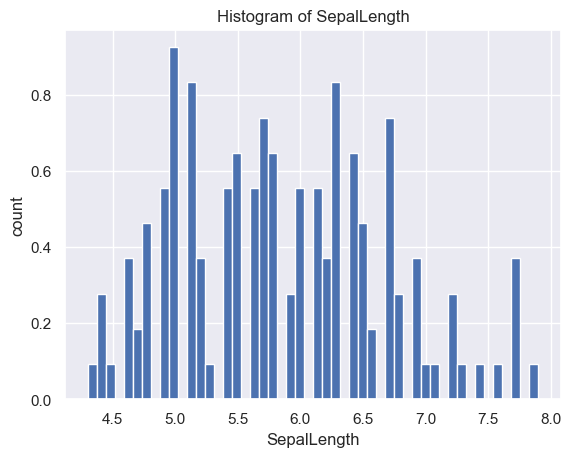

In [27]:
plt.hist(iris['SepalLengthCm'],bins=50,density=True)
plt.title('Histogram of SepalLength')
plt.xlabel('SepalLength')
plt.ylabel('count')

Text(0, 0.5, 'count')

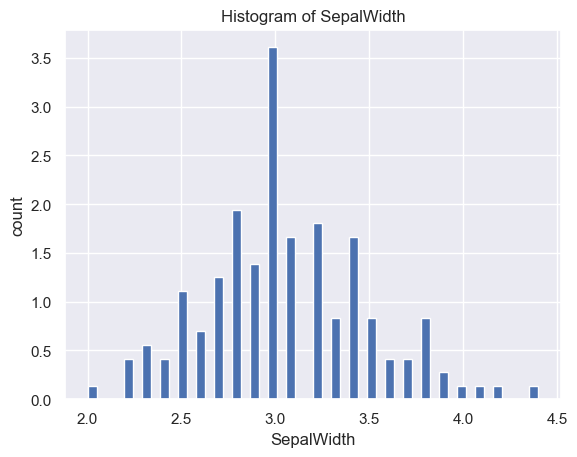

In [28]:
plt.hist(iris['SepalWidthCm'],bins=50,density=True)
plt.title('Histogram of SepalWidth')
plt.xlabel('SepalWidth')
plt.ylabel('count')

Text(0, 0.5, 'count')

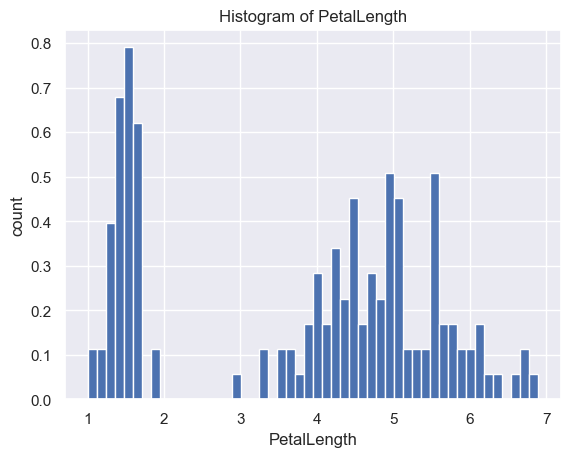

In [29]:
plt.hist(iris['PetalLengthCm'],bins=50,density=True)
plt.title('Histogram of PetalLength')
plt.xlabel('PetalLength')
plt.ylabel('count')

Text(0, 0.5, 'count')

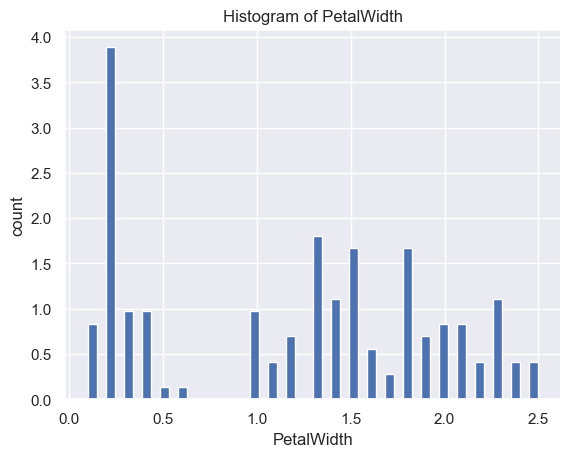

In [30]:
plt.hist(iris['PetalWidthCm'],bins=50,density=True)
plt.title('Histogram of PetalWidth')
plt.xlabel('PetalWidth')
plt.ylabel('count')

### Heat Map

C:\Users\HP\AppData\Local\Temp\ipykernel_308\3307013167.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True) #to give annotation annot = True


<Axes: >

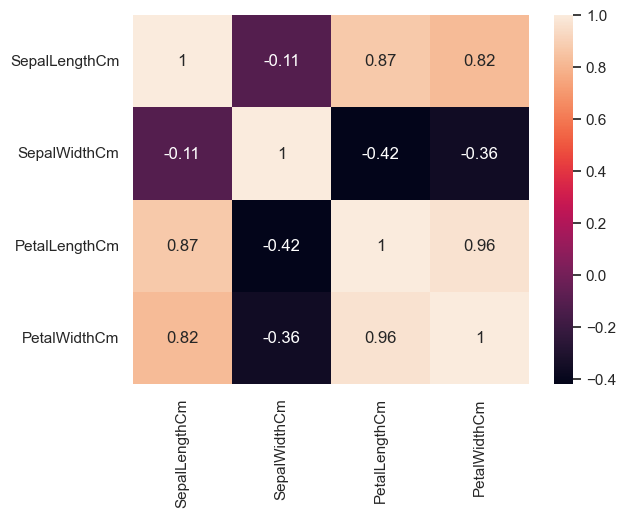

In [31]:
sns.heatmap(iris.corr(),annot=True) #to give annotation annot = True

## Data Preparation

In [32]:
# Create a dictionary to map iris species names to numerical labels
sp = {"Iris-setosa":1,"Iris-versicolor":2,"Iris-virginica":3}

In [33]:
iris['Species'] = iris['Species'].map(sp) # filtered_df = df.loc[df['Species'].isin(sp)]

In [34]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


### Split the Iris dataset into feature variables (X) and the target variable (y)


In [35]:
X = iris.iloc[:,0:4] # independent
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
y = iris.iloc[:,4] # dependent
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

### Split into train and test set 

In [37]:
# Split the data into training and testing sets (30% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Train a Decision Tree Classifier with moderate depth
model2 = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [39]:
# Make predictions on the test set
y_pred = model2.predict(X_test)

In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [41]:
# Print a classification report for detailed performance analysis
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [42]:
def training_model(model):
    model.fit(X_train, y_train) # Train the model on the training data
    y_pred = model.predict(X_test) # Make predictions on the test data
    accuracy = accuracy_score(y_test, y_pred) # Accuracy

    print(f'Accuracy: {accuracy * 100:.2f}%')

In [43]:
model = svm.SVC() # Create an instance of the SVM classifier
svc_model = training_model(model) # Train and evaluate the model using the training_model function

Accuracy: 100.00%
